### Importing libraries

In [82]:
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prashant.raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Dataframe formation

In [3]:
with open(r"C:\Users\prashant.raj\Downloads\New folder\email_campaigns.pkl", 'rb') as file:
    data = pickle.load(file)

In [4]:
data[51]['example1'][2].keys()

dict_keys(['subject', 'body', 'opened', 'meeting link clicked', 'responded'])

In [5]:
sub_list=[]
body_list=[]
open_list=[]
clicked_status=[]
response_list=[]

In [6]:
data[51]['example1'][0]

{'subject': 'Boost Your Brand Visibility 🚀',
 'body': "Hello [Recipient's Name],\n\nWant to skyrocket your company's market presence? Our innovative marketing analytics services are the fuel you need for that liftoff! Let's explore this space together. Fancy a quick call? 🌟 [meeting link]\n\nBest Wishes,\n[Your Name]",
 'opened': True,
 'meeting link clicked': False,
 'responded': False}

In [7]:
for i in range(len(data)):
    keys = data[i].keys()
    for key in keys:
        key=key
    temp1=data[i][key]

   
    for j in range(len(temp1)):
        temp2=temp1[j]
        
        colums = temp2.keys()
        colums_list=[]
        for col in colums:
            colums_list.append(col)

        sub_list.append(temp2[colums_list[0]])
        body_list.append(temp2[colums_list[1]])
        open_list.append(temp2[colums_list[2]])
        clicked_status.append(temp2[colums_list[3]])
        response_list.append(temp2[colums_list[4]])

In [8]:
len(sub_list)

152

In [9]:
def remove_emojis(text):
    emojis_to_remove = ["⌚"]

    # Constructing the regex pattern
    emoji_pattern = f"[{''.join(map(re.escape, emojis_to_remove))}" \
                    f"\U0001F600-\U0001F64F\U0001F300-\U0001F5FF" \
                    f"\U0001F680-\U0001F6FF\U0001F700-\U0001F77F" \
                    f"\U0001F780-\U0001F7FF\U0001F800-\U0001F8FF" \
                    f"\U0001F900-\U0001F9FF\U0001FA00-\U0001FA6F" \
                    f"\U0001FA70-\U0001FAFF\U00002702-\U000027B0" \
                    f"\U000024C2-\U0001F251]+"

    cleaned_text = re.sub(emoji_pattern, '', text)
    
    return cleaned_text

In [10]:
subs = sub_list
new_subs=[]
for s in subs:
    new_sub=remove_emojis(s)
    new_subs.append(new_sub)

In [11]:
# body_list
new_body_list=[]
for body_text in body_list:
    new_body=remove_emojis(body_text)
    new_body_list.append(new_body)

### Creating dataframe

In [13]:
df=pd.DataFrame({'subject':new_subs,'body':new_body_list,'open':open_list,'meeting link clicked':clicked_status,'responded':response_list})

In [33]:
df.head()

,subject,body,open,meeting link clicked,responded,conversation
0,Propel Your Marketing ROI with Advanced Analy...,"Hey [Recipient's Name],\n\nReady to see your m...",False,False,False,Propel Your Marketing ROI with Advanced Analy...
1,Data is Your Superpower Unlock Insights with Us,"Hi [Recipient's Name],\n\nI'm reaching out aga...",True,False,False,Data is Your Superpower Unlock Insights with ...
2,Turn Marketing Data Into Decisions Let's Expl...,"Greetings [Recipient's Name],\n\nWe haven't co...",False,False,False,Turn Marketing Data Into Decisions Let's Expl...
3,Marketing Success is a Click Away - Let's Chat...,"Hello [Recipient's Name],\n\nIt's clear that y...",True,True,False,Marketing Success is a Click Away - Let's Chat...
4,Boost Your Brand's Visibility with Proven Mar...,"Hi [Recipient's Name],\n\nIn the digital age, ...",False,False,False,Boost Your Brand's Visibility with Proven Mar...


In [93]:
for i,j,k,l,m in zip(df['body'],df['subject'],df['meeting link clicked'],df['open'],df["responded"]):
    print(f"Subject: {j}\nBody: {i}\n\nOpen: {l}\n\nResponeded: {m}\n\nClicked: {k}")
    print("\n------------------------------------------------------------------------------------------------\n")

Subject:  Propel Your Marketing ROI with Advanced Analytics!
Body: Hey [Recipient's Name],

Ready to see your marketing performance soar? With our cutting-edge Marketing Analytics services, your business can harness the power of data to drive decision-making and skyrocket ROI!

Quick question - are you leveraging your data to its full potential? Let's talk strategy!  [meeting link]

Best,
[Your Name]

Open: False

Responeded: False

Clicked: False

------------------------------------------------------------------------------------------------

Subject: Data is Your Superpower  Unlock Insights with Us
Body: Hi [Recipient's Name],

I'm reaching out again because I believe our last message might've slipped through the cracks. With your goals in mind, our marketing analytics can translate your data into actionable strategies that can redefine your marketing's success.

Can we help you harness this superpower? Book a time on my calendar: [meeting link]. Looking forward to connecting!

Chee

### Data analysis

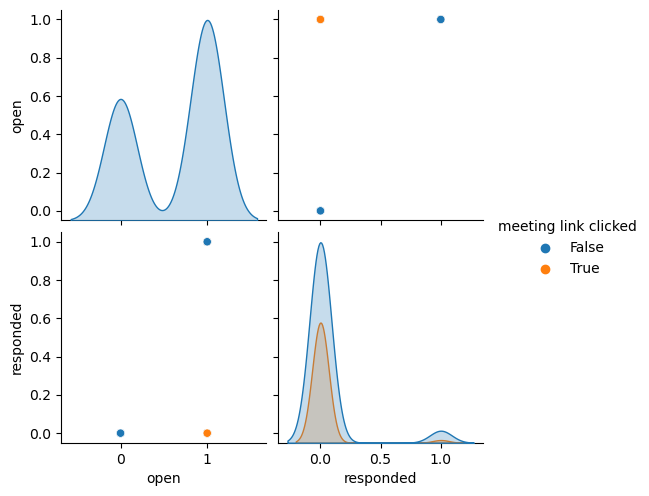

In [91]:
sns.pairplot(df, hue='meeting link clicked')

<Axes: xlabel='meeting link clicked', ylabel='open'>

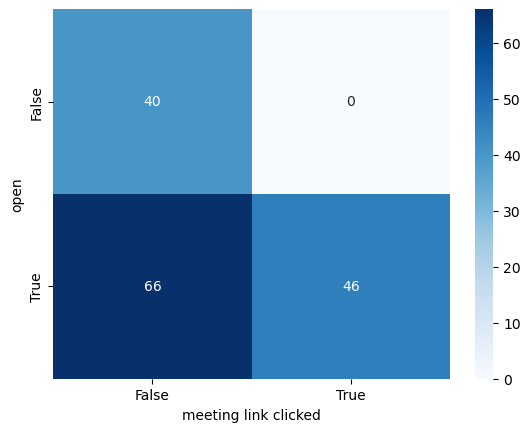

In [90]:
cross_tab = pd.crosstab(df['open'], df['meeting link clicked'])

# Create a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues')

<Axes: xlabel='meeting link clicked', ylabel='responded'>

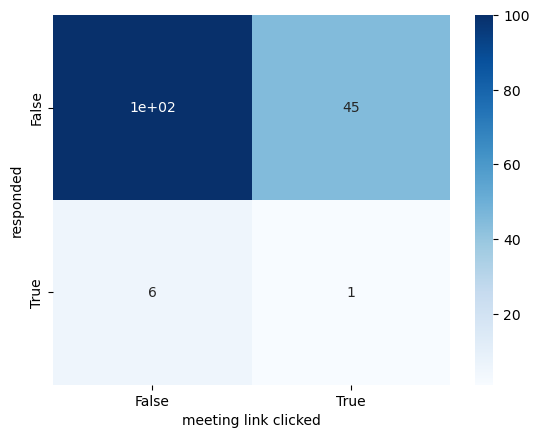

In [92]:
cross_tab = pd.crosstab(df['responded'], df['meeting link clicked'])

# Create a heatmap
sns.heatmap(cross_tab, annot=True, cmap='Blues')

In [19]:
df['conversation']=df['subject']+df['body']

In [21]:
df2=df[['conversation','open','responded','meeting link clicked']]

### Feature engineering

In [23]:
def clean_text(text):
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    text = ' '.join([word for word in words if word not in stop_words])
    # Perform stemming (optional)
    ps = PorterStemmer()
    text = ' '.join([ps.stem(word) for word in words])
    return text

In [24]:
df2['clean_text']=df['conversation'].apply(clean_text)

In [202]:
vectorizer = CountVectorizer(max_features=800)

In [203]:
X_text_features = vectorizer.fit_transform(df2['clean_text'])

In [204]:
df_text_features = pd.DataFrame(X_text_features.toarray(), columns=vectorizer.get_feature_names_out())

In [205]:
df3=pd.concat([df2['open'],df2['responded'],df_text_features], axis=1)

In [206]:
df3['open']=df3['open'].astype(int)
df3['responded']=df3['responded'].astype(int)
df3.head()

,open,responded,10min,15,15min,15minut,20,20min,30,50,...,wouldnt,ye,yet,you,youd,youhello,youhey,youll,your,youv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,5,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,4,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,5,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,10,0


In [216]:
X=df3
y=df2['meeting link clicked'].astype(int)

### Data spliting and Model development

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [218]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [219]:
y_pred = model.predict(X_test)

### Reporting

In [220]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8387096774193549
Classification Report:
               precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       0.00      0.00      0.00         5

    accuracy                           0.84        31
   macro avg       0.42      0.50      0.46        31
weighted avg       0.70      0.84      0.77        31



#### Accuracy: 84%

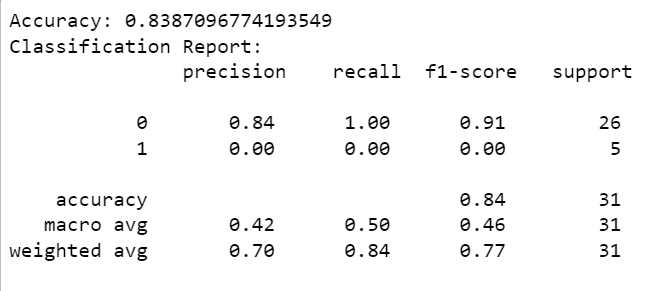